<a href="https://colab.research.google.com/github/tintamaria95/CocoriGo/blob/main/SN_DM_CZE_0.389.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DL Project

##Golois import

In [1]:
!wget https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
!unzip project2022.zip

--2022-11-11 14:30:46--  https://www.lamsade.dauphine.fr/~cazenave/project2022.zip
Resolving www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)... 193.48.71.250
Connecting to www.lamsade.dauphine.fr (www.lamsade.dauphine.fr)|193.48.71.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138784129 (132M) [application/zip]
Saving to: ‘project2022.zip’

project2022.zip     100%[===================>] 132.35M  15.2MB/s    in 15s     

2022-11-11 14:31:02 (9.05 MB/s) - ‘project2022.zip’ saved [138784129/138784129]

Archive:  project2022.zip
  inflating: Board.h                 
  inflating: Game.h                  
  inflating: Rzone.h                 
  inflating: compile.sh              
  inflating: compileMAC.sh           
  inflating: games.data              
  inflating: golois.cpp              
  inflating: golois.cpython-310-x86_64-linux-gnu.so  
  inflating: golois.cpython-37m-x86_64-linux-gnu.so  
  inflating: golois.cpython-38-x86_64-linux-gnu.so  
  inflat

In [ ]:
!python golois.py

getValidation
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
tcmalloc: large alloc 2400002048 bytes == 0x5744e000 @  0x7f1ac7c42887 0x7f1a4d7b70d9 0x7f1a4d7bc85f 0x7f1a4d7d106f 0x58f6e4 0x5105e2 0x5b4ee6 0x6005a3 0x607796 0x60785c 0x60a436 0x64db82 0x64dd2e 0x7f1ac783dc87 0x5b636a
nbPositionsSGF = 29425326
nbPositionsSGF = 29425326
generating validation.data
2022-11-10 12:08:34.866373: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board (InputLayer)             [(None, 19, 19, 31)  0           []                               
                                ]                                                                 
                                                                

##Neural Network

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers 
from tensorflow.keras import regularizers
import gc

import golois

In [6]:
planes = 31
moves = 361
N = 10000
epochs = 600
batch = 128
filters = 31

In [7]:
input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)

getValidation


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board (InputLayer)             [(None, 19, 19, 31)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_129 (Conv2D)            (None, 19, 19, 31)   8680        ['board[0][0]']                  
                                                                                                  
 batch_normalization_111 (Batch  (None, 19, 19, 31)  124         ['conv2d_129[0][0]']             
 Normalization)                                                                                   
                                                                                            

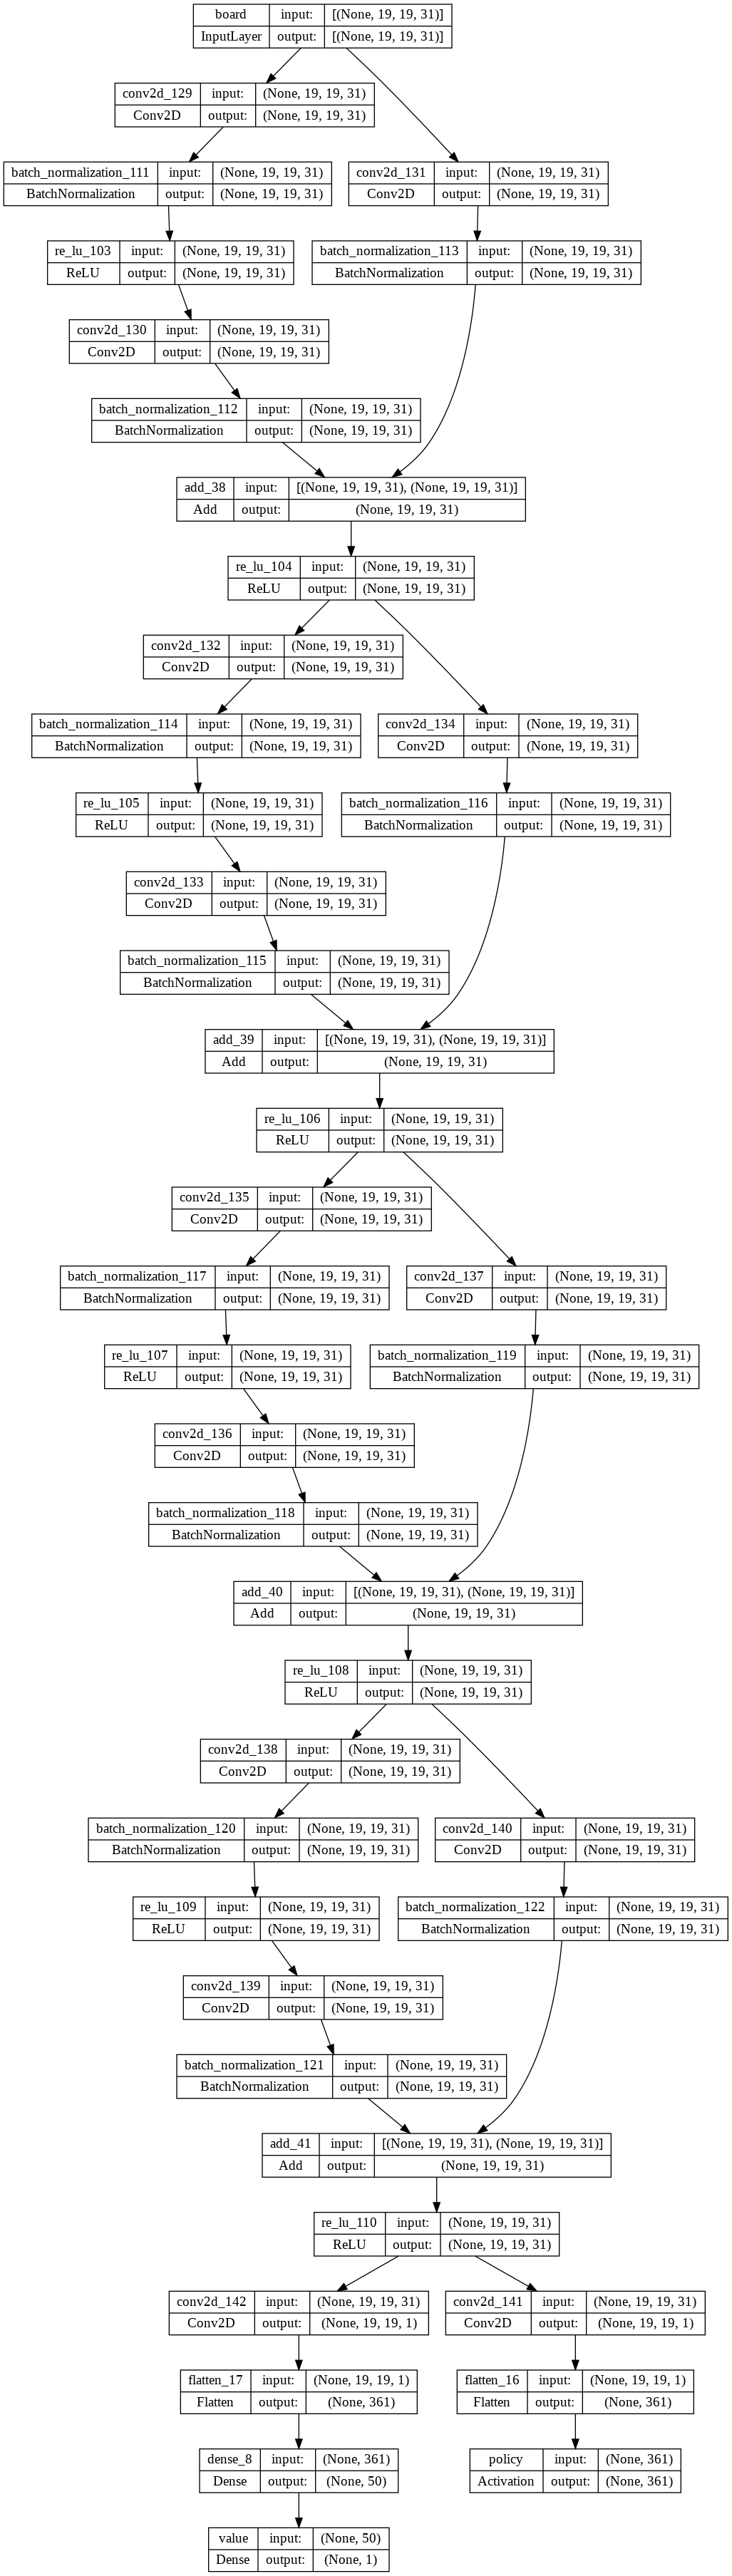

In [21]:
input = keras.Input(shape=(19, 19, planes), name='board')

#Block 1
x_1 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(input)
b_1 = layers.BatchNormalization()(x_1)
r_1 = layers.ReLU()(b_1)
x_2 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(r_1)
b_1_bis = layers.BatchNormalization()(x_2)

i_1 = layers.Conv2D(filters, 2, strides=(1, 1), padding='same')(input)
n_1 = layers.BatchNormalization()(i_1)

z_1 = tf.keras.layers.Add()([b_1_bis, n_1])
z_1_bis = layers.ReLU()(z_1)

#Block 2
x_3 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(z_1_bis)
b_2 = layers.BatchNormalization()(x_3)
r_2 = layers.ReLU()(b_2)
x_4 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(r_2)
b_2_bis = layers.BatchNormalization()(x_4)

i_2 = layers.Conv2D(filters, 2, strides=(1, 1), padding='same')(z_1_bis)
n_2 = layers.BatchNormalization()(i_2)

z_2 = tf.keras.layers.Add()([b_2_bis, n_2])
z_2_bis = layers.ReLU()(z_2)

#Block 3
x_5 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(z_2_bis)
b_3 = layers.BatchNormalization()(x_5)
r_3 = layers.ReLU()(b_3)
x_6 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(r_3)
b_3_bis = layers.BatchNormalization()(x_6)

i_3 = layers.Conv2D(filters, 1, strides=(1, 1), padding='same')(z_2_bis)
n_3 = layers.BatchNormalization()(i_3)

z_3 = tf.keras.layers.Add()([b_3_bis, n_3])
z_3_bis = layers.ReLU()(z_3)

#Block 4
x_7 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(z_3_bis)
b_4 = layers.BatchNormalization()(x_7)
r_4 = layers.ReLU()(b_4)
x_8 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(r_4)
b_4_bis = layers.BatchNormalization()(x_8)

i_4 = layers.Conv2D(filters, 1, strides=(1, 1), padding='same')(z_3_bis)
n_4 = layers.BatchNormalization()(i_4)

z_4 = tf.keras.layers.Add()([b_4_bis, n_4])
z_4_bis = layers.ReLU()(z_4)

#Final
'''x_9 = layers.Conv2D(filters, 3, strides=(1, 1), padding='same')(z_4_bis)
b_5 = layers.BatchNormalization()(x_9)
r_5 = layers.ReLU()(b_5)'''

policy_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(z_4_bis)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Activation('softmax', name='policy')(policy_head)
value_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(z_4_bis)
value_head = layers.Flatten()(value_head)
value_head = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
value_head = layers.Dense(1, activation='sigmoid', name='value', kernel_regularizer=regularizers.l2(0.0001))(value_head)

model = keras.Model(inputs=input, outputs=[policy_head, value_head])

model.summary ()

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.003, momentum=.9),
              loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
              loss_weights={'policy' : 1.0, 'value' : 1.0},
              metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

display(keras.utils.plot_model(model, str('test_0' + ".png"), show_shapes=True))

In [22]:
for i in range (1, epochs + 1):
    print ('epoch ' + str (i))
    golois.getBatch (input_data, policy, value, end, groups, i * N)
    history = model.fit(input_data,
                        {'policy': policy, 'value': value}, 
                        epochs=1, batch_size=batch)
    if (i % 5 == 0):
        gc.collect ()
    if (i % 20 == 0):
        golois.getValidation (input_data, policy, value, end)
        val = model.evaluate (input_data,
                              [policy, value], verbose = 0, batch_size=batch)
        print ("val =", val)
        model.save ('test.h5')

epoch 1
79/79 [==============================] - 4s 28ms/step - loss: 6.3194 - policy_loss: 5.5970 - value_loss: 0.7131 - policy_categorical_accuracy: 0.0130 - value_mse: 0.1299
epoch 2
79/79 [==============================] - 2s 28ms/step - loss: 5.3144 - policy_loss: 4.6099 - value_loss: 0.6952 - policy_categorical_accuracy: 0.0739 - value_mse: 0.1204
epoch 3
79/79 [==============================] - 2s 30ms/step - loss: 4.7467 - policy_loss: 4.0436 - value_loss: 0.6937 - policy_categorical_accuracy: 0.1424 - value_mse: 0.1208
epoch 4
79/79 [==============================] - 2s 28ms/step - loss: 4.4679 - policy_loss: 3.7654 - value_loss: 0.6932 - policy_categorical_accuracy: 0.1861 - value_mse: 0.1208
epoch 5
79/79 [==============================] - 2s 28ms/step - loss: 4.3578 - policy_loss: 3.6551 - value_loss: 0.6935 - policy_categorical_accuracy: 0.2044 - value_mse: 0.1197
epoch 6
79/79 [==============================] - 2s 28ms/step - loss: 4.2140 - policy_loss: 3.5118 - value_los